# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

Поэтому в первой части модуля мы рассмотрим основные инструменты, позволяющие производить такой анализ, а также методы сортировки данных.

При наличие нескольких таблиц необходимо объединить в единую структуру — об этом мы и поговорим во второй части модуля.

Цели данного модуля:

- Научиться сортировать данные.
- Получить навыки группировки данных и анализа групп.
- Освоить методы построения сводных таблиц и научиться с их помощью исследовать зависимости в признаках.
- Научиться работать с данными, представленными в виде нескольких таблиц, и познакомиться с методами их объединения.

In [2]:
import pandas as pd

melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,1,1,202.0,126.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,1,0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,2,0,134.0,150.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,2,1,94.0,126.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,1,2,120.0,142.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


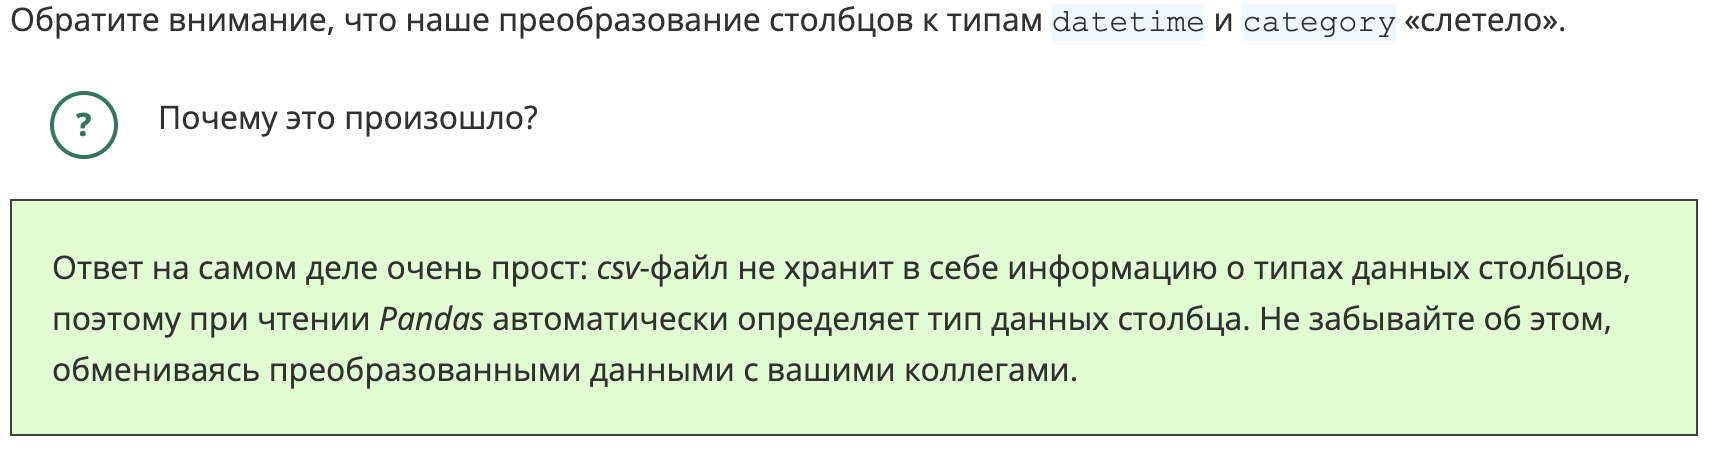

In [3]:
# Файл подгрузился верно, однако есть один нюанс. Давайте посмотрим на информацию о 
# столбцах с помощью метода info():

display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

In [4]:
# Преобразуйте столбец Date в формат datetime и выделите квартал (quarter) продажи 
# объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве 
# ответа запишите число объектов, проданных в этом квартале.
melb_df['Date'] = pd.to_datetime(melb_df['Date'])

In [8]:
# Функция для получения квартала
def get_quarter(month):
    if 1 <= month <= 3:
        return 1
    elif 4 <= month <= 6:
        return 2
    elif 7 <= month <= 9:
        return 3
    elif 10 <= month <= 12:
        return 4
    else:
        return 'Invalid month'

# получаем квартал    
melb_df['quarter'] = melb_df['Date'].dt.month.apply(get_quarter)
melb_df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,quarter
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,1,1,202.0,126.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019,25.200000,-0.231707,3,46,5,St,1,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,1,0,156.0,79.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019,15.800000,-0.327660,4,116,5,St,1,2
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,2,0,134.0,150.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019,18.750000,0.056338,4,117,0,St,0,2
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,2,1,94.0,126.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019,15.750000,0.145455,4,47,0,other,0,2
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,1,2,120.0,142.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019,17.750000,0.083969,4,2,2,St,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,other,4,house,1245000.0,S,Barry,2017-08-26,16.7,3150,4,2,2,652.0,126.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392,12.600000,-0.676093,8,36,5,Cr,1,3
13576,Williamstown,3,house,1031000.0,SP,Williams,2017-08-26,6.8,3016,3,2,2,333.0,133.0,NaN,-37.85927,144.87904,Western Metropolitan,6380,16.625000,-0.429185,8,22,5,Dr,1,3
13577,Williamstown,3,house,1170000.0,S,Raine,2017-08-26,6.8,3016,3,2,4,436.0,126.0,NaN,-37.85274,144.88738,Western Metropolitan,6380,15.750000,-0.551601,8,20,5,St,1,3
13578,Williamstown,4,house,2500000.0,PI,Sweeney,2017-08-26,6.8,3016,4,1,5,866.0,157.0,NaN,-37.85908,144.89299,Western Metropolitan,6380,17.444444,-0.693060,8,97,5,St,1,3


In [9]:
melb_df[melb_df['quarter'] == 2]['Price'].shape[0]

4359

In [12]:
melb_df['quarter'].value_counts()

3    4873
2    4359
4    2329
1    2019
Name: quarter, dtype: int64

Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных category, исключив из преобразования столбцы Date, Rooms, Bedroom, Bathroom, Car.
В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных category.

In [13]:
# Определим количество уникальных значений
# Создаём пустой список
unique_list = []
# Пробегаемся по именам столбцов в таблице
for col in melb_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, melb_df[col].nunique(),melb_df[col].dtypes) # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Weekend,2,int64
1,Type,3,object
2,quarter,4,int64
3,Method,5,object
4,WeekdaySale,7,int64
5,Regionname,8,object
6,Rooms,9,int64
7,Bathroom,9,int64
8,StreetType,11,object
9,Car,11,int64


In [14]:
# Сделаем преобразование столбцов к типу данных category:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
for col in melb_df.columns: # цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        melb_df[col] = melb_df[col].astype('category') # преобразуем тип столбца
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

# 2. Сортировка данных в DataFrame

__МЕТОД SORT_VALUES()__

Для сортировки значений в DataFrame по значениям одного или нескольких столбцов используется метод sort_values().

Основные параметры метода sort_values()

- by — имя или список имён столбцов, по значениям которых производится сортировка.
- axis — ось, по которой производится сортировка (0 — строки, 1 — столбцы). По умолчанию сортировка производится по строкам.
- ascending — сортировка по возрастанию (от меньшего к большему). По умолчанию параметр выставлен на True, для сортировки по убыванию (от большего к меньшему) необходимо выставить его на False.
- ignore_index — создаются ли новые индексы в таблице. По умолчанию выставлен на False и сохраняет индексы изначальной таблицы.
- inplace — производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на False, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на True.

In [15]:
# Сортировка по значениям одного столбца
# Отсортируем таблицу по возрастанию цены объектов недвижимости (Price):

melb_df.sort_values(by='Price').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,quarter
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,1,0,0.0,126.0,Maribyrnong,-37.79110,144.89000,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0,1
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,1,2,499.0,155.0,Glen Eira,-37.88640,145.02420,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,1,1,36.0,126.0,Brimbank,-37.78330,144.82660,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1,2
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,1,1,536.0,164.0,Moreland,-37.75550,144.96580,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0,2
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,1,0,322.0,126.0,Boroondara,-37.81980,145.03730,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0,3
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,1,0,1250.0,126.0,NaN,-37.77685,144.95188,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1,3
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,1,0,30.0,26.0,Maribyrnong,-37.80141,144.89587,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1,1
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,1,1,0.0,126.0,Maribyrnong,-37.79800,144.86720,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1,2
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,1,1,2347.0,43.0,Brimbank,-37.78520,144.82720,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0,3
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,1,1,0.0,126.0,Brimbank,-37.78390,144.82390,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1,3


In [16]:
# Отсортируем таблицу по убыванию (от самой последней до самой первой) даты продажи 
# объекта (Date). Для этого выставим параметр ascending на False:

melb_df.sort_values(by='Date', ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend,quarter
11144,Northcote,4,house,1955000.0,SP,McGrath,2017-12-08,5.3,3070,4,2,1,5.0,126.0,Darebin,-37.76280,144.99375,Northern Metropolitan,11364,12.600000,0.923664,12,47,4,St,0,4
11217,Surrey Hills,3,house,1775000.0,PI,Jellis,2017-12-08,10.2,3127,3,2,2,780.0,126.0,Boroondara,-37.81403,145.08968,Southern Metropolitan,5457,15.750000,-0.721854,12,47,4,Rd,0,4
11206,St Kilda,4,house,1600000.0,VB,Gary,2017-12-08,5.0,3182,4,2,3,613.0,160.0,Port Phillip,-37.86667,144.98324,Southern Metropolitan,13240,16.000000,-0.586028,12,107,4,St,0,4
11207,Strathmore,7,house,2000000.0,SP,Nelson,2017-12-08,8.2,3041,7,3,4,608.0,355.0,Moonee Valley,-37.73681,144.90587,Western Metropolitan,3284,20.882353,-0.262721,12,18,4,Rd,0,4
11208,Strathmore,4,house,1610000.0,S,other,2017-12-08,8.2,3041,4,3,2,861.0,274.0,Moonee Valley,-37.73154,144.92243,Western Metropolitan,3284,24.909091,-0.517181,12,62,4,St,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Camberwell,4,house,2650000.0,S,Jellis,2016-03-09,7.8,3124,4,2,1,652.0,189.0,Boroondara,-37.82860,145.06860,Southern Metropolitan,8920,18.900000,-0.550535,3,126,2,Rd,0,1
4510,Oak Park,3,house,892000.0,S,Nelson,2016-03-09,11.5,3046,3,1,3,757.0,126.0,Moreland,-37.71800,144.91740,Northern Metropolitan,2651,18.000000,-0.714609,3,46,2,St,0,1
4388,Northcote,3,house,1200000.0,S,Nelson,2016-03-09,5.5,3070,3,1,1,215.0,125.0,Darebin,-37.77590,144.99090,Northern Metropolitan,11364,17.857143,-0.264706,3,96,2,St,0,1
6184,Surrey Hills,3,house,1205000.0,S,Fletchers,2016-01-28,11.2,3127,3,1,2,490.0,126.0,Whitehorse,-37.83610,145.10060,Southern Metropolitan,5457,18.000000,-0.590909,1,46,3,Rd,0,1


#### СОРТИРОВКА ПО ЗНАЧЕНИЯМ НЕСКОЛЬКИХ СТОЛБЦОВ

Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр by в виде списка. При этом важно обращать внимание на порядок следования столбцов.

Так, например, отсортируем таблицу сначала по возрастанию расстояния от центра города (Distance), а затем — по возрастанию цены объекта (Price). Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов Distance и Price результирующей таблицы:

In [17]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


In [18]:
melb_df.sort_values(by=['Price', 'Distance']).loc[::10, ['Distance', 'Price']]

,Distance,Price
2652,6.4,85000.0
7116,7.8,200000.0
5206,11.2,220000.0
7240,8.2,241000.0
2898,13.0,250000.0
...,...,...
13341,6.3,4060000.0
8591,1.5,4275000.0
1094,11.2,4700000.0
5801,6.1,5046000.0


__КОМБИНИРОВАНИЕ СОРТИРОВКИ С ФИЛЬТРАЦИЕЙ__

Найдём информацию о таунхаусах (Type), проданных компанией (SellerG) McGrath, у которых коэффициент соотношения площадей здания и участка (AreaRatio) меньше -0.8. Результат отсортируем по дате продажи (Date) в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр ignore_index на True. Для наглядности результата выберем из таблицы только столбцы Data и AreaRatio:

In [19]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


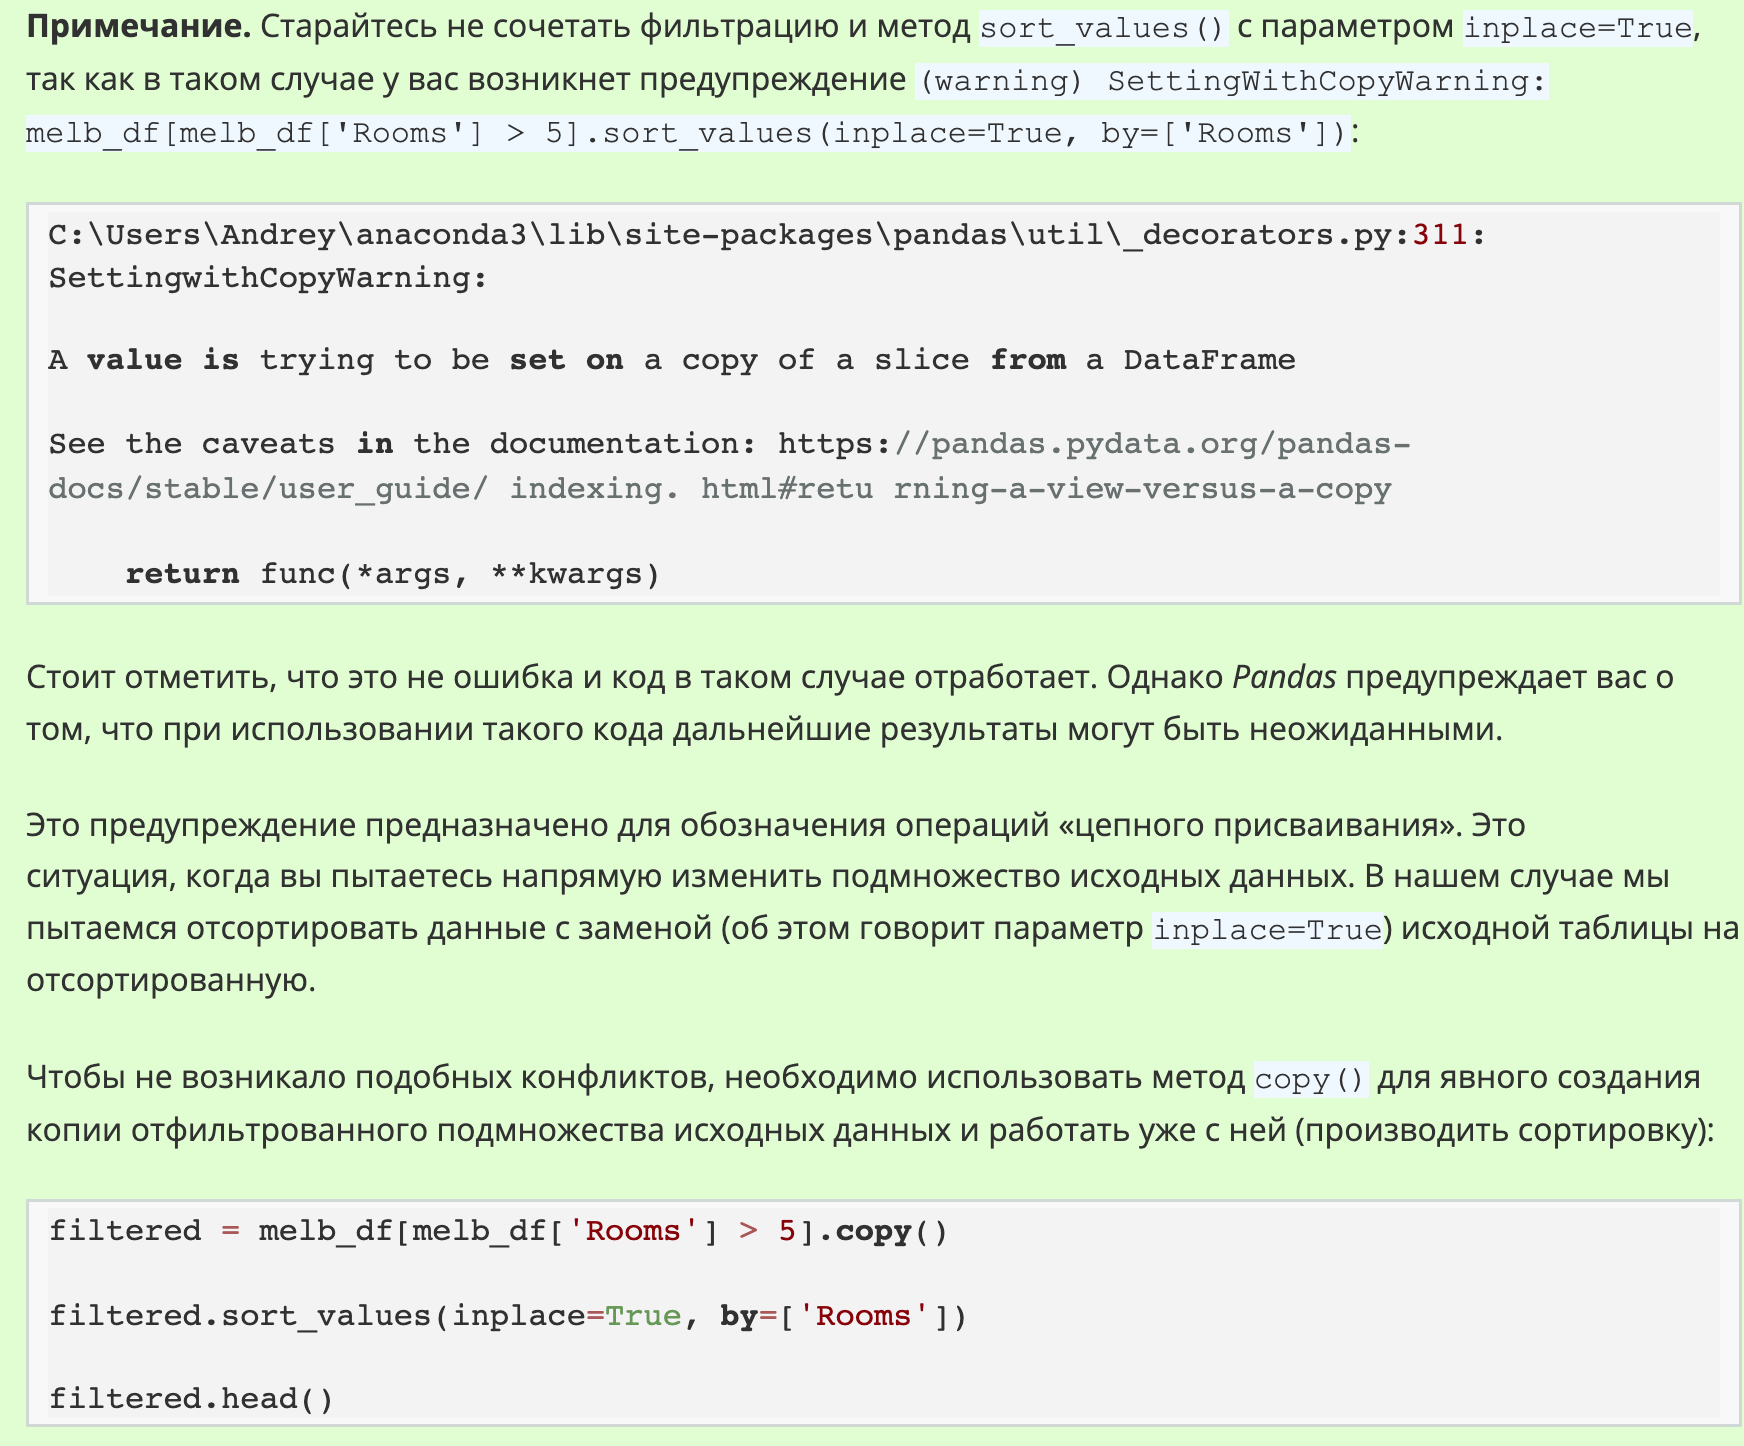

Произведите сортировку столбца AreaRatio по убыванию. При этом индексы полученной таблицы замените на новые. Какое значение площади здания находится в строке 1558? Ответ округлите до целого числа.

In [37]:
melb_df.sort_values(by='AreaRatio', ascending=False, ignore_index=True).loc[1558]['BuildingArea']

126.0

Найдите таунхаусы (Type) с количеством жилых комнат (Rooms) больше 2. Отсортируйте полученную таблицу сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат (MeanRoomsSquare). Индексы таблицы замените на новые. Какая цена будет у объекта в строке 18? Ответ запишите в виде целого числа.

In [44]:
melb_df[(melb_df['Type'] == 'townhouse') & (melb_df['Rooms'] > 2)
       ].sort_values(by=['Rooms', 'MeanRoomsSquare'], ascending=[True, False], 
                     ignore_index=True).loc[18]['Price']

1300000.0

# 3. Группировка данных в DataFrame

Так или иначе, владение группировкой — важный навык, который открывает новые возможности по работе с данными.

__МЕТОД GROUPBY()__

В библиотеке Pandas для группировки данных по одному или нескольким признакам можно использовать метод groupby().

Основные параметры метода groupby()

- by — имя или список имён столбцов, по которым производится группировка.
- axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.
- as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.

Метод groupby() возвращает объект DataFrameGroupBy, который хранит в себе информацию о том, какие строки относятся к определённой группе, и сам по себе не представляет для нас интереса. 

Однако к этому объекту можно применять уже знакомые нам агрегирующие методы (mean, median, sum и т. д.), чтобы рассчитывать показатели внутри каждой группы.

Посмотрим на общую схему работы метода groupby() в Pandas:

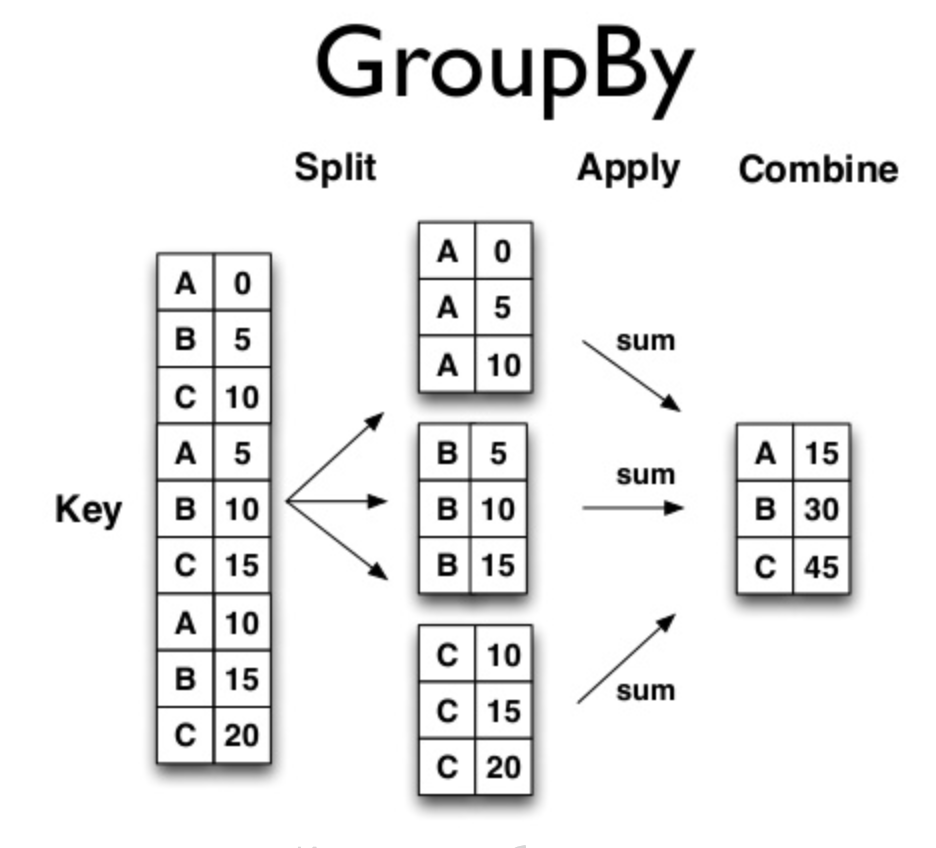

Сначала мы разделяем данные на группы с помощью метода groupby(), после чего к каждой группе применяем агрегацию и объединяем результаты в новую таблицу.

ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С ОДНОЙ АГРЕГАЦИЕЙ

Рассмотрим группировку данных на примере нашей таблицы с недвижимостью.

Применим агрегирующую функцию среднего к результату работы groupby(). В качестве столбца для группировки возьмём столбец типа объекта недвижимости (Type):



In [45]:
melb_df.groupby(by='Type').mean()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
Type,,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


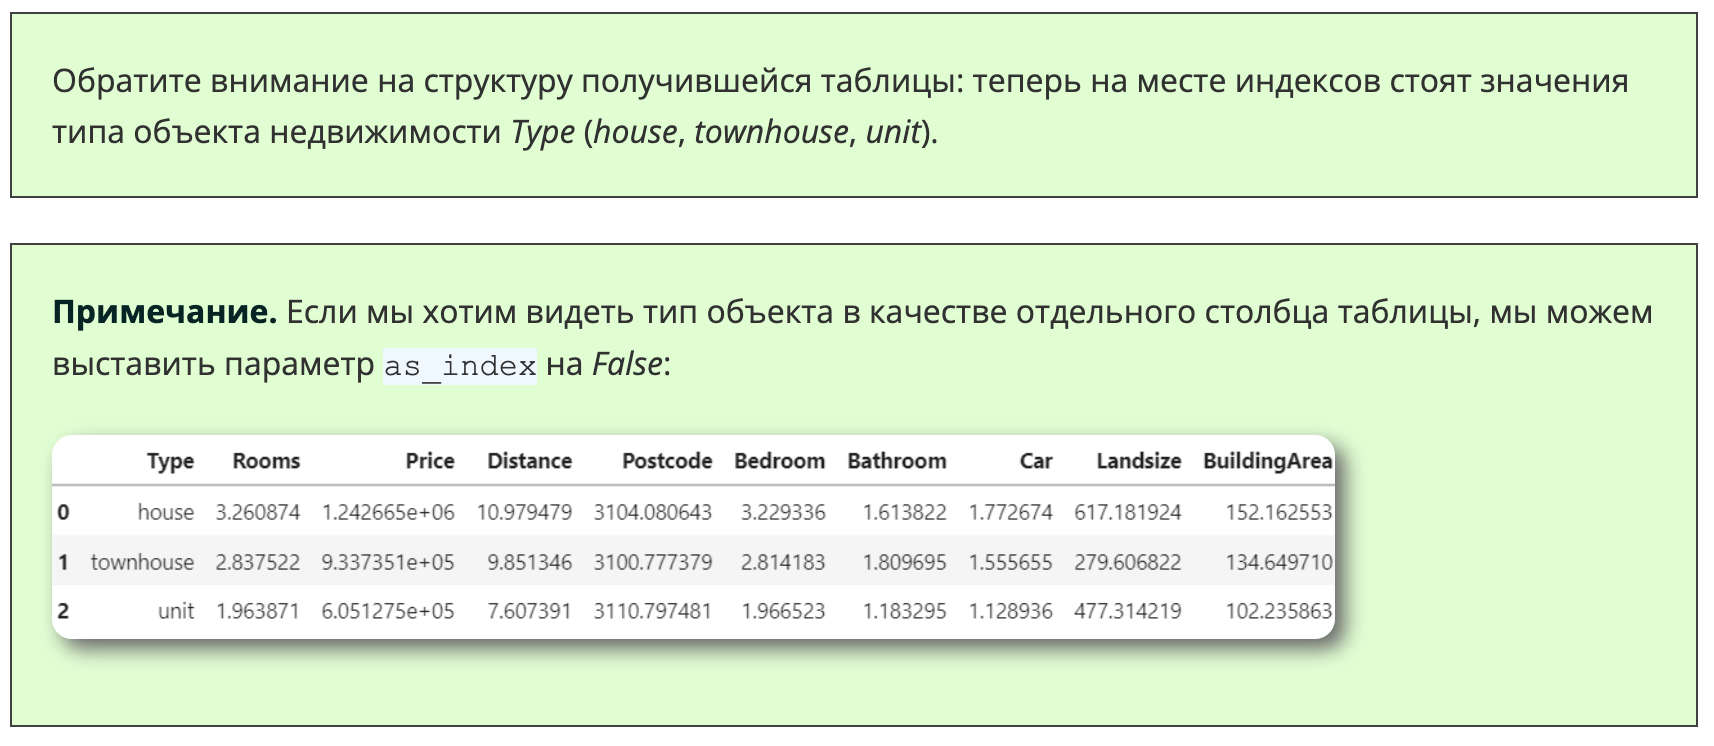

In [46]:
# сравним средние цены на объекты в зависимости от их типа:

melb_df.groupby('Type')['Price'].mean()

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

Из этой маленькой таблицы видно, что наибольшей средней ценой обладают объекты типа house (дома, коттеджи, виллы). Следовательно, можно сделать вывод, что тип постройки является значимым фактором при определении цены объекта недвижимости.

In [48]:
# Теперь давайте выясним, какие регионы (Regionname) наиболее удалены от центра Мельбурна.
# Для этого найдём минимальное значение расстояния от центра города до объекта в 
# зависимости от его региона. Результат отсортируем по убыванию расстояния:

melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)
# Итак, наиболее удалёнными являются все регионы Victoria.

Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С НЕСКОЛЬКИМИ АГРЕГАЦИЯМИ

Чтобы рассчитать несколько агрегирующих методов, можно воспользоваться методом agg(), который принимает список строк с названиями агрегаций.

Давайте построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (Price), сгруппированных по номеру месяца продажи (MonthSale). Результат отсортируем по количеству продаж в порядке убывания:

In [49]:
melb_df.groupby('MonthSale')['Price'].agg(['count', 'mean', 'max']
                                    ).sort_values(by='count', ascending=False)

,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


Какие интересные выводы можно сделать из этой таблицы?

1. Пик продаж приходится на период весна-лето.

2. Средняя цена продаваемых объектов относительно стабильна и находится в пределах 1 млн. австралийских долларов с небольшими отклонениями (около 100 тыс. влево и вправо).

3. Прослеживается некоторая зависимость между сезоном и максимальной ценой объектов: в месяцы с большим спросом на объекты недвижимости цена также имеет наибольшие показатели. Можно сделать предположение, что это связано с повышением цен на элитные дома в периоды большого спроса.

In [51]:
# полная информация обо всех основных статистических характеристиках внутри каждой группы
melb_df.groupby('MonthSale')['Price'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
MonthSale,,,,,,,,
1,278.0,9.397921e+05,577668.924214,170000.0,570500.0,795000.0,1111250.0,5200000.0
2,333.0,1.169051e+06,671564.357417,131000.0,710000.0,1020000.0,1478000.0,4735000.0
3,1408.0,1.146762e+06,709573.596867,85000.0,680000.0,945000.0,1400000.0,5600000.0
4,1246.0,1.050479e+06,591892.902979,145000.0,655000.0,905500.0,1298750.0,5500000.0
5,1644.0,1.097807e+06,668492.867996,145000.0,650000.0,905000.0,1371250.0,8000000.0
6,1469.0,1.068981e+06,606010.069052,222000.0,660000.0,900000.0,1325000.0,7650000.0
7,1835.0,9.314698e+05,537390.803161,190000.0,586750.0,800000.0,1150000.0,9000000.0
8,1850.0,1.056371e+06,619617.476541,160000.0,635000.0,892000.0,1310000.0,6500000.0
9,1188.0,1.126349e+06,608734.690742,170000.0,725000.0,980000.0,1360000.0,6400000.0


После базовых математических функций наиболее частым агрегированием является подсчёт числа уникальных значений. Так, например, мы можем вычислить число уникальных риелторских компаний в зависимости от региона, чтобы понять, в каких регионах конкуренция на рынке недвижимости меньше. Это можно сделать, передав в параметр метода agg() строку 'nunique'. 

Более того, метод agg() поддерживает использование и других функций. Передадим дополнительно встроенную функцию set, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

In [53]:
melb_df.groupby('Regionname')['SellerG'].agg(['nunique', set])
# Как и ожидалось, наименьшая конкуренция в наиболее удалённом регионе Western Victoria,
# а наибольшая — в центральном районе Northern Metropolitan.

,nunique,set
Regionname,,
Eastern Metropolitan,26,"{Barry, Noel, RT, Kay, C21, Jellis, Buxton, Ra..."
Eastern Victoria,11,"{C21, Harcourts, Ray, hockingstuart, Eview, Mc..."
Northern Metropolitan,40,"{Alexkarbon, LITTLE, Raine, Burnham, Barry, RT..."
Northern Victoria,11,"{Ray, McDonald, YPA, Barry, hockingstuart, McG..."
South-Eastern Metropolitan,25,"{Barry, Chisholm, Noel, O'Brien, C21, Buxton, ..."
Southern Metropolitan,38,"{LITTLE, Raine, Williams, Chisholm, Noel, RT, ..."
Western Metropolitan,34,"{Alexkarbon, Raine, Burnham, Williams, Moonee,..."
Western Victoria,6,"{Ray, YPA, hockingstuart, Raine, other, HAR}"


Сгруппируйте данные по признаку количества комнат и найдите среднюю цену объектов недвижимости в каждой группе. В качестве ответа запишите количество комнат, для которых средняя цена наибольшая.

In [66]:
melb_df.groupby('Rooms')['Price'].mean().sort_values(ascending=False).index[0]

7

Какой регион имеет наименьшее стандартное отклонение по географической широте (Lattitude)?
В качестве ответа запишите название этого региона

In [70]:
melb_df.groupby('Regionname')['Lattitude'].std().sort_values().index[0]

'Western Victoria'

Какая риелторская компания (SellerG) имеет наименьшую общую выручку за период с 1 мая по 1 сентября (включительно) 2017 года?
Для ответа на этот вопрос рассчитайте сумму продаж (Price) каждой компании в заданный период.
Не забудьте перевести даты в формат datetime.

In [82]:
melb_df[(melb_df['Date'] >= '2017-05-01') & (melb_df['Date'] <= '2017-09-01')
       ].groupby('SellerG')['Price'].sum().sort_values()

SellerG
LITTLE             2742000.0
Cayzer             4439000.0
Burnham            4550500.0
Moonee             7328000.0
Thomson            8332000.0
                    ...     
hockingstuart    282834310.0
Barry            296723050.0
other            365038432.0
Nelson           379767500.0
Jellis           414121833.0
Name: Price, Length: 50, dtype: float64

# 4. Сводные таблицы

Сводные таблицы — это распространённый инструмент для агрегации данных.

__МЕТОД GROUPBY КАК СПОСОБ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ__

На самом деле мы с вами уже строили простейшие одномерные сводные таблицы с помощью метода groupby — мы рассматривали сводную таблицу в контексте группировки по одному признаку. 

In [83]:
# мы уже умеем строить таблицу, которая показывает зависимость медианной цены и площади
# здания от числа комнат:

melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


In [84]:
# Также можно построить таблицу, в которой мы будем учитывать не только число комнат,
# но и тип здания (Type). Для этого в параметрах метода groupby() укажем список из 
# нескольких интересующих нас столбцов.

melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
       unit                  NaN
6      house        1.869508e+06
       townhouse             NaN
       unit         5.200000e+05
7      house        1.920700e+06
       townhouse             NaN
       unit                  NaN
8      house        1.510286e+06
       townhouse             NaN
       unit         2.250000e+06
10     house        9.000000e+05
       townhouse             NaN
       unit                  NaN
Name: Price, dtype: float64

В результате выполнения такого кода мы получаем Series, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется иерархической. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.

Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй — по столбцам), а не в виде Series с иерархическими индексами, к результату чаще всего применяют метод unstack(), который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [85]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

Type,house,townhouse,unit
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
5,1.877327e+06,1.035000e+06,NaN
6,1.869508e+06,NaN,5.200000e+05
7,1.920700e+06,NaN,NaN
8,1.510286e+06,NaN,2.250000e+06
10,9.000000e+05,NaN,NaN


1. Пропуски в сводной таблице (NaN) говорят о том, что в наших данных нет соответствующих комбинаций признаков. Например, у нас нет информации о ценах на таунхаусы, где количество комнат больше пяти.

2. Наибольшей средней стоимостью (2,25 млн. австралийских долларов) обладают объекты типа unit с восемью жилыми комнатами. Наименьшая средняя стоимость — у однокомнатных домов типа unit (чуть меньше 400 тыс. австралийских долларов).

3. Сколько бы комнат ни было в доме, цена на объекты типа unit всегда ниже других (за исключением восьмикомнатных объектов).

#### МЕТОД PIVOT_TABLE ДЛЯ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ

На самом деле метод groupby редко используется при двух параметрах, так как для построения сводных таблиц существует специальный и более простой метод — pivot_table().

Основные параметры метода pivot_table()

- values — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;
- index — имя столбца, значения которого станут строками сводной таблицы;
- columns — имя столбца, значения которого станут столбцами сводной таблицы;
- aggfunc — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, 'mean');
- fill_value — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

In [86]:
# Построим таблицу с помошью pivot_table
# В качестве параметра values укажем столбец Price, в качестве индексов сводной таблицы
# возьмём Rooms, а в качестве столбцов — Type. Агрегирующую функцию оставим по 
# умолчанию (среднее). Дополнительно заменим пропуски в таблице на значение 0.
# Финальный результат для наглядности вывода округлим с помощью метода round() до целых.

melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',    fill_value=0
).round()

Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


А теперь давайте проанализируем продажи в каждом из регионов в зависимости от того, будний был день или выходной. Для этого построим сводную таблицу, в которой строками будут являться названия регионов (Regionname), а в столбцах будет располагаться наш «признак-мигалка» выходного дня (Weekend), который равен 1, если день был выходным, и 0 — в противном случае. В качестве значений сводной таблицы возьмём количество продаж.

In [87]:
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
)

Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


1. Число продаж резко возрастает в выходные вне зависимости от региона (приблизительно в 2-3 раза). То есть вероятность того, что дом продадут в выходные, гораздо выше вероятности, что его продадут в будний день.

2. В отдалённых регионах (Victoria) коэффициент роста числа продаж выше, чем в центральных. Если в центральных регионах Metropolitan продажи по выходным в 2-2.5 раза выше, чем по будням, то в регионах Victoria число продаж в выходные вырастает примерно в 3 раза.

Такой рост можно даже попытаться объяснить логически: в выходные дни у людей появляется свободное время, чтобы доехать до отдалённых пригородов с целью покупки дома.

In [88]:
#  найдём, как зависит средняя и медианная площадь участка (Landsize) от типа объекта
# (Type) и его региона (Regionname). 
# в аргументе aggfunc список из агрегирующих функций, пропущенные значения заменим на 0
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

Здесь в глаза бросаются объекты типа house в регионах Eastern Victoria и Northern Victoria — в них среднее и медиана отличаются более чем в три раза. Вероятно, это связано с тем, что в этих районах очень большой разброс цен: есть несколько объектов с гигантской площадью, а остальные объекты имеют небольшую площадь. Из-за этого среднее значение искажается, в то время как медиана нечувствительна к такому разбросу и не искажает результат.

#### МНОГОМЕРНЫЕ СВОДНЫЕ ТАБЛИЦЫ

До этого мы рассматривали, как некоторый статистический показатель может зависеть от двух признаков. Однако, как уже упоминалось, сводные таблицы позволяют наблюдать зависимость и от большего числа признаков. Такие сводные таблицы называются многомерными. 

Для того чтобы исследовать зависимость от большего числа признаков, можно передать список признаков в параметр index или параметр columns.

Давайте построим таблицу, в которой по индексам будут располагаться признаки метода продажи (Method) и типа объекта (Type), по столбцам — наименование региона (Regionname), а на пересечении строк и столбцов будет стоять медианная цена объекта (Price):

In [89]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                   1244000            780000   
       townhouse                760000                 0   
       unit                     650000                 0   
S      house                   1127000            675000   
       townhouse                828000                 0   
       unit                     645750            492000   
SA     house                    932500            950000   
       townhouse                807500                 0   
       unit                          0                 0   
SP     house                   1050000            672500   
       townhouse                910000                 0   
       unit                     515000            400000   
VB     house                   1100000            712500   
       townhouse                892500                 0   
       unit                     500000                 0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                     900000             500000   
       townhouse                 632500                  0   
       unit                      410000                  0   
S      house                     920000             555000   
       townhouse                 750000                  0   
       unit                      525500                  0   
SA     house                     817500             540000   
       townhouse                 425000                  0   
       unit                      616000                  0   
SP     house                     900000             521000   
       townhouse                 690000                  0   
       unit                      470000                  0   
VB     house                    1050000             690000   
       townhouse                 640000                  0   
       unit                      450000                  0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                          865000                1725000   
       townhouse                     1190000                1055000   
       unit                           525000                 571250   
S      house                          883300                1611000   
       townhouse                      875000                1135000   
       unit                           606000                 655000   
SA     house                          880000                1390000   
       townhouse                           0                1141000   
       unit                                0                 580000   
SP     house                          770000                1521750   
       townhouse                      800000                1162500   
       unit                           601000                 550000   
VB     house                          850000                1800000   
       townhouse                           0                1250000   
       unit                           700000                 500000   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                    870000            630000  
       townhouse                670000                 0  
       unit                     360000                 0  
S      house                    870000            397500  
       townhouse                729000                 0  
       unit                     489000                 0  
SA     house                    772500                 0  
       townhouse                467500                 0  
       unit                     571000                 0  
SP     house                    865000            360000  
       t

можно видеть, что вне зависимости от метода продажи и региона цена на объекты типа house практически всегда выше, чем на объекты другого типа.

__ДОСТУП К ДАННЫМ В СВОДНОЙ ТАБЛИЦЕ__

Как получить доступ к данным или произвести фильтрацию в сложной сводной таблице, где есть дополнительные индексы?

In [91]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)
pivot

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

In [92]:
# Выведем её столбцы с помощью атрибута columns:

pivot.columns

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

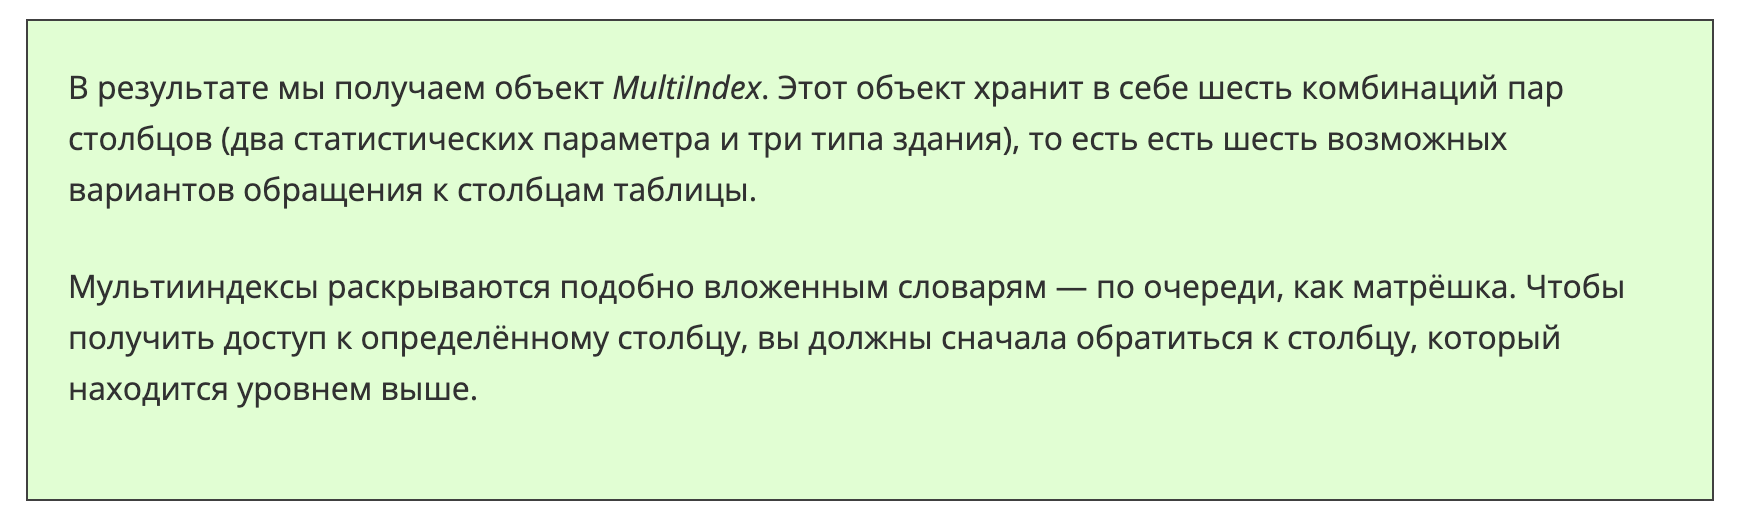

Так, из таблицы pivot мы можем получить средние значения площадей участков для типа здания unit, просто последовательно обратившись по имени столбцов:

In [93]:
display(pivot['mean']['unit'])

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

In [95]:
# фильтрация данных
#  средняя площадь здания для домов типа house меньше их медианной площади
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

median                       mean              \
Type                   house townhouse unit       house   townhouse   
Regionname                                                            
Southern Metropolitan  586.0     246.0    0  569.643881  278.858824   
Western Metropolitan   531.0     198.0   62  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

In [96]:
# Чтобы получить индексы отфильтрованной таблицы, можно воспользоваться атрибутом 
# index и обернуть результат в список:

print(list(filtered_pivot.index))

['Southern Metropolitan', 'Western Metropolitan']


In [97]:
# создание вручную
import numpy as np
mser = pd.Series(
    np.random.rand(8),
index=[['white','white','white','blue','blue','red','red','red'], 
           ['up','down','right','up','down','up','down','left']])
display(mser)

white  up       0.003621
       down     0.951328
       right    0.062713
blue   up       0.038339
       down     0.693408
red    up       0.877401
       down     0.236669
       left     0.741004
dtype: float64

В данном примере мы создаём объект Series со вложенными индексами. Мы передаём в качестве индексов Series вложенный список, где первый список задаёт внешний уровень вложенности, а второй список — внутренний уровень вложенности. Значения Series — случайные числа от 0 до 1, сгенерированные функцией np.random.rand() (ваши значения могут отличаться).

Если посмотреть на индексы Series, можно увидеть, что они являются мультииндексами:

In [98]:
print(mser.index)

MultiIndex([('white',    'up'),
            ('white',  'down'),
            ('white', 'right'),
            ( 'blue',    'up'),
            ( 'blue',  'down'),
            (  'red',    'up'),
            (  'red',  'down'),
            (  'red',  'left')],
           )


In [99]:
# Аналогично создаются DataFrame со вложенными признаками (вложенными столбцами) — для
# этого вложенный список передаётся в параметр columns при инициализации таблицы:

mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index=[['white','white','red','red'], ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up    0.277436 -0.685684 -0.088005 -0.108920
      down -0.888609  0.574729  0.818376 -1.700886
red   up   -0.295587  0.110511 -0.317698 -0.691160
      down  0.462828 -1.818046  0.277399 -0.385585

Составьте сводную таблицу, которая показывает зависимость медианной площади (BuildingArea) здания от типа объекта недвижимости (Type) и количества жилых комнат в доме (Rooms). Для какой комбинации признаков площадь здания наибольшая?
В качестве ответа запишите эту комбинацию (тип здания, число комнат) через запятую, без пробелов.

In [100]:
pivottab = melb_df.pivot_table(
    values='BuildingArea',
    index='Type',
    columns='Rooms',
    aggfunc='median',
    fill_value=0
)
pivottab

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126,126,141.0,177,126,216.5,126,126
townhouse,88.0,114,126,159.5,152,0,0.0,0,0
unit,69.5,110,126,126.0,0,171,0.0,126,0


Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости (Price) от риелторского агентства (SellerG) и типа здания (Type).
Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа unit максимальна. В качестве ответа запишите название этого агентства.

In [111]:
pivotag = melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc='median',
    fill_value=0
)
pivotag

Type,house,townhouse,unit
SellerG,,,
Alexkarbon,1036250,935000,560000
Barry,830000,727500,502000
Bells,692500,430500,457500
Biggin,1151750,675000,548000
Brad,875000,700000,465000
...,...,...,...
Williams,1161000,735000,577000
Woodards,1261000,865500,600000
YPA,596250,498500,443500


In [120]:
pivotag['unit'].sort_values(ascending=False).index[0]

'Nick'

# 5. Объединение DataFrame: знакомимся с новыми данными

